<a href="https://colab.research.google.com/github/Taewan0508/ml_trading_strat/blob/main/Machine_Learning_Strat_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Taewan0508/ml_trading_strategy.git
%cd ml_trading_strat

Cloning into 'ml_trading_strategy'...
fatal: could not read Username for 'https://github.com': No such device or address
[Errno 2] No such file or directory: 'ml_trading_strat'
/content/ml_trading_strat


In [ ]:
!pwd

/content/ml_trading_strat


In [ ]:
from src.data_loader import load_price_data
from src.features import build_features
from src.labels import make_labels
from src.validation import walk_forward_split
from src.models import train_logistic
from src.backtest import generate_positions, backtest

df = load_price_data("SPY", "2010-01-01", "2024-01-01")

X = build_features(df)
y = make_labels(df).loc[X.index]

splits = walk_forward_split(X, train_size=750, test_size=250)

results = []

for train_idx, test_idx in splits:
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]

    model = train_logistic(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]

    positions = generate_positions(probs)
    returns = X_test['ret_1']

    perf = backtest(positions, returns)
    results.append(perf['sharpe'])

print("Average Sharpe:", sum(results) / len(results))



/content/ml_trading_strat/src/data_loader.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Average Sharpe: -0.5240935770482202


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.data_loader import load_price_data
from src.features import build_features
from src.labels import make_labels
from src.models import train_logistic
from src.validation import walk_forward_split
from src.backtest import generate_positions, backtest

In [ ]:
df = load_price_data(
    symbol="SPY",
    start="2010-01-01",
    end="2024-01-01"
)

df.head()


/content/ml_trading_strat/src/data_loader.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Open,High,Low,Close,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2010-01-04,84.307704,85.072976,83.662473,85.027962,118944600
2010-01-05,84.975441,85.290552,84.667828,85.253036,111579900
2010-01-06,85.170512,85.523139,85.102990,85.313065,116074400
2010-01-07,85.155492,85.778217,84.915407,85.673180,131091100
2010-01-08,85.448107,85.995806,85.275549,85.958290,126402800


In [ ]:
X = build_features(df)
y = make_labels(df).loc[X.index]

print(X.shape, y.shape)


(3473, 8) (3473, 1)


In [ ]:
splits = walk_forward_split(
    data=X,
    train_size=750,  # ~3 years
    test_size=250    # ~1 year
)

In [ ]:
all_pnl = []

for train_idx, test_idx in splits:
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_test, y_test = X.loc[test_idx], y.loc[test_idx]

    model = train_logistic(X_train, y_train)
    probs = model.predict_proba(X_test)[:, 1]

    positions = generate_positions(probs)
    returns = X_test['ret_1']

    perf = backtest(positions, returns)
    all_pnl.append(perf['equity'])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

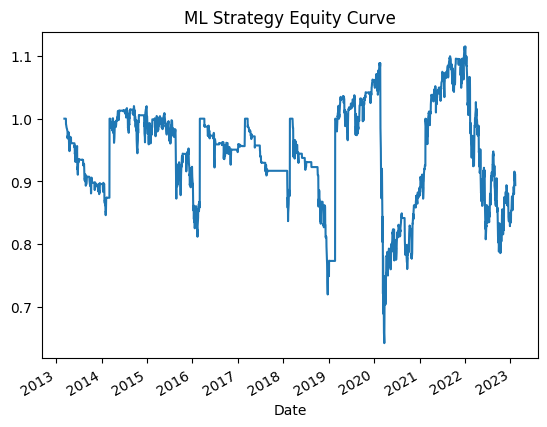

In [ ]:
equity = pd.concat(all_pnl).sort_index()

equity.plot(title="ML Strategy Equity Curve")
plt.show()
